# Birdstrikes

by Fasih Atif and Abduvosid Malikov

This analysis is dedicated to learn birdstrikes and its causes.  

### Libraries

In [1]:
import os
import pandas as pd 
import numpy as np 

In [2]:
# Matplotlib is the python plotting library 
import matplotlib.pyplot as plt 

# Seaborn is a wrapper for Matplotlib and makes some things easier, generally imported as "sns"
import seaborn as sns 

# Get data

For the analysis, we used data from Kaggle. Source: https://www.kaggle.com/faa/wildlife-strikes/code

In [3]:
wild_data = pd.read_csv('database.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (9,12,15,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
wild_data = pd.read_csv('database.csv', low_memory=False) 

### Data Overview

In [5]:
wild_data.shape

(174104, 66)

Data contains 174105 rows and 66 columns. 

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
wild_data.head()

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,4.0,34.0,40,2.0,D,1,1.0,NaN,NaN,KCVG,CINCINNATI/NORTHERN KENTUCKY INTL ARPT,KY,ASO,NaN,CLIMB,NaN,NaN,NaN,NaN,NaN,NE1,GULL,1,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,4.0,34.0,10,2.0,D,5,5.0,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,TAKEOFF RUN,NaN,NaN,0.0,NaN,0.0,ZZ201,HOUSE SPARROW,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHLI,LIHUE ARPT,HI,AWP,NaN,NaN,NaN,NaN,NaN,NaN,0.0,R1101,BARN OWL,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,3.0,22.0,NaN,2.0,D,NaN,NaN,NaN,NaN,KMYR,MYRTLE BEACH INTL,SC,ASO,NaN,APPROACH,DAY,NaN,200.0,138.0,NaN,UNKBM,UNKNOWN MEDIUM BIRD,1,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KJAX,JACKSONVILLE INTL,FL,ASO,NaN,CLIMB,DAY,NaN,100.0,200.0,NaN,ZX,FINCH,1,NaN,NaN,NaN,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
wild_data.columns 

Index(['Record ID', 'Incident Year', 'Incident Month', 'Incident Day',
       'Operator ID', 'Operator', 'Aircraft', 'Aircraft Type', 'Aircraft Make',
       'Aircraft Model', 'Aircraft Mass', 'Engine Make', 'Engine Model',
       'Engines', 'Engine Type', 'Engine1 Position', 'Engine2 Position',
       'Engine3 Position', 'Engine4 Position', 'Airport ID', 'Airport',
       'State', 'FAA Region', 'Warning Issued', 'Flight Phase', 'Visibility',
       'Precipitation', 'Height', 'Speed', 'Distance', 'Species ID',
       'Species Name', 'Species Quantity', 'Flight Impact', 'Fatalities',
       'Injuries', 'Aircraft Damage', 'Radome Strike', 'Radome Damage',
       'Windshield Strike', 'Windshield Damage', 'Nose Strike', 'Nose Damage',
       'Engine1 Strike', 'Engine1 Damage', 'Engine2 Strike', 'Engine2 Damage',
       'Engine3 Strike', 'Engine3 Damage', 'Engine4 Strike', 'Engine4 Damage',
       'Engine Ingested', 'Propeller Strike', 'Propeller Damage',
       'Wing or Rotor Strike', 'Win

We have different types of columns, including numeric and categorical (integer, float, object). The variables describe the Airport, Aircraft, and Species

In [11]:
wild_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174104 entries, 0 to 174103
Data columns (total 66 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Record ID             174104 non-null  int64  
 1   Incident Year         174104 non-null  int64  
 2   Incident Month        174104 non-null  int64  
 3   Incident Day          174104 non-null  int64  
 4   Operator ID           174104 non-null  object 
 5   Operator              174104 non-null  object 
 6   Aircraft              174104 non-null  object 
 7   Aircraft Type         133074 non-null  object 
 8   Aircraft Make         131051 non-null  object 
 9   Aircraft Model        122439 non-null  object 
 10  Aircraft Mass         127320 non-null  float64
 11  Engine Make           123434 non-null  float64
 12  Engine Model          121988 non-null  object 
 13  Engines               127342 non-null  float64
 14  Engine Type           127282 non-null  object 
 15  

Data contains a lot of missing values in different columns

In [12]:
null_columns = wild_data.columns[wild_data.isnull().any()]
print(wild_data[null_columns].isnull().sum())

Aircraft Type        41030
Aircraft Make        43053
Aircraft Model       51665
Aircraft Mass        46784
Engine Make          50670
Engine Model         52116
Engines              46762
Engine Type          46822
Engine1 Position     47911
Engine2 Position     55389
Engine3 Position    162445
Engine4 Position    171012
Airport                290
State                21976
FAA Region           18902
Warning Issued       97686
Flight Phase         55302
Visibility           64171
Precipitation        85782
Height               70427
Speed               102846
Distance             74391
Species Name            80
Species Quantity      4477
Flight Impact        74639
Fatalities          173539
Injuries            173875
dtype: int64


There were 12 birdstrikes that caused to at least 1 fatality 

In [30]:
len(wild_data[wild_data['Fatalities'] >= 1])

12

### Data Cleaning

To narrow down the research, we decided to filter birdstrikes that happened after 2010

In [13]:
wild_filtered = wild_data[wild_data['Incident Year'] >= 2010] 

In [16]:
len(wild_filtered)

67351

67351 birdstrikes were recorded starting from 2010

In [17]:
state_filtered = wild_filtered[wild_filtered['State'].notna()]

In [20]:
len(state_filtered)

58736

58736 observations does not contain missing value for the State column

There is no row that does not contain missing value for any column

In [21]:
rows_no_missing = wild_filtered.dropna()

In [22]:
rows_no_missing

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage


Instead of 66 columns, we decided to focus on most important variables and dropped the rest. The variables we used is shown below

In [39]:
columns_filtered = state_filtered[['Incident Year', 'Incident Month', 'Incident Day', 'Operator ID', 'Operator', 'Aircraft', 'Airport ID', 'Airport', 'State', 'Flight Phase', 'Visibility', 'Height', 'Speed', 'Distance', 'Species ID', 'Species Name', 'Species Quantity', 'Flight Impact']]

In [41]:
columns_filtered.head()

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,Visibility,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact
106753,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,DAY,0.0,30.0,0.0,NE1,GULL,1,ABORTED TAKEOFF
106754,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,DAY,0.0,120.0,0.0,ZT3,GRACKLE,1,NONE
106755,2010,1,1,RPA,REPUBLIC AIRLINES,EMB-170,KBDL,BRADLEY INTL,CT,CLIMB,DAY,NaN,NaN,NaN,ZX002,LAPLAND LONGSPUR,1,NONE
106756,2010,1,1,WJA,WESTJET,B-737-800,PHNL,HONOLULU INTL ARPT,HI,TAKEOFF RUN,NIGHT,0.0,NaN,0.0,N5122,PACIFIC GOLDEN-PLOVER,1,NONE
106757,2010,1,1,DAL,DELTA AIR LINES,B-737-800,KMIA,MIAMI INTL,FL,LANDING ROLL,DAY,0.0,NaN,0.0,N5111,KILLDEER,2-10,NONE


Here we check the missing values again

In [67]:
miss_columns = columns_filtered.columns[columns_filtered.isnull().any()]

In [69]:
print(columns_filtered[miss_columns].isnull().sum())

Flight Phase        20962
Visibility          23478
Height              25681
Speed               37820
Distance            12730
Species Name           78
Species Quantity     1448
Flight Impact       26422
dtype: int64


The list above shows the column name and number of rows where the value for that column is missing 

In [74]:
df_cleaned = columns_filtered.dropna(subset=['Flight Phase', 'Visibility', 'Height'], axis = 0)

Now we know the columns where the most missing values are. We dropped the relative rows

In [78]:
len(df_cleaned)

31063

We left with 31063 observations

In [81]:
df_cleaned["incident_date"] = df_cleaned["Incident Year"].astype(str) + "-" + df_cleaned["Incident Month"].astype(str) + "-" + df_cleaned["Incident Day"].astype(str)
df_cleaned["incident_date"] = pd.to_datetime(df_cleaned['incident_date'], format= '%Y-%m-%d').astype(str)

<ipython-input-81-f530b0af7413>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["incident_date"] = df_cleaned["Incident Year"].astype(str) + "-" + df_cleaned["Incident Month"].astype(str) + "-" + df_cleaned["Incident Day"].astype(str)
<ipython-input-81-f530b0af7413>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["incident_date"] = pd.to_datetime(df_cleaned['incident_date'], format= '%Y-%m-%d').astype(str)


In [82]:
df_cleaned.head()

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,Visibility,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,incident_date
106753,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,DAY,0.0,30.0,0.0,NE1,GULL,1,ABORTED TAKEOFF,2010-01-01
106754,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,DAY,0.0,120.0,0.0,ZT3,GRACKLE,1,NONE,2010-01-01
106756,2010,1,1,WJA,WESTJET,B-737-800,PHNL,HONOLULU INTL ARPT,HI,TAKEOFF RUN,NIGHT,0.0,NaN,0.0,N5122,PACIFIC GOLDEN-PLOVER,1,NONE,2010-01-01
106757,2010,1,1,DAL,DELTA AIR LINES,B-737-800,KMIA,MIAMI INTL,FL,LANDING ROLL,DAY,0.0,NaN,0.0,N5111,KILLDEER,2-10,NONE,2010-01-01
106758,2010,1,1,AAL,AMERICAN AIRLINES,MD-82,KDFW,DALLAS/FORT WORTH INTL ARPT,TX,CLIMB,DAY,800.0,160.0,NaN,H4105,DOUBLE-CRESTED CORMORANT,2-10,NONE,2010-01-01


## Exploratory Data Analysis

First, we want to see in which Airline operator the most of the birdstrikes occured

In [92]:
df_cleaned["Operator"].value_counts().head(10)

SOUTHWEST AIRLINES    5343
BUSINESS              3580
AMERICAN AIRLINES     2365
FEDEX EXPRESS         1840
DELTA AIR LINES       1618
US AIRWAYS            1296
UPS AIRLINES          1162
SKYWEST AIRLINES      1087
UNITED AIRLINES       1074
JETBLUE AIRWAYS       1039
Name: Operator, dtype: int64

In [93]:
# Get the numnber of occurances of each operator
operator_counts = df_cleaned.Operator.value_counts()

# Split and Save the Operator names in a variable
operators = operator_counts.index

# Split and Save the counts in another variable
counts = operator_counts.values

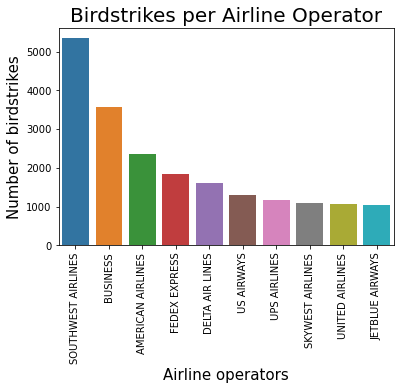

In [94]:
# Create barplot object
plt.xticks(rotation=90)

# Add the x-axis title
plt.xlabel("Airline operators", fontsize=15)

# Add the y-axis title
plt.ylabel("Number of birdstrikes", fontsize=15)

# Add the plot title
plt.title("Birdstrikes per Airline Operator", fontsize=20)

# Create the plot
barplot = sns.barplot(x=operators[:10], y=counts[:10])

This plot shows the top Airline operators

Now we want to see how the number of incidents changed over the years (2010 - 2015)

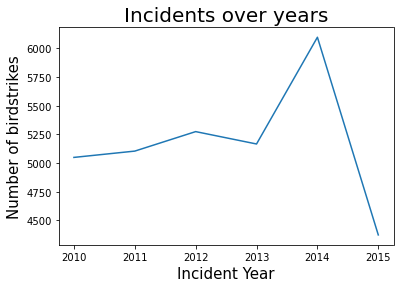

In [96]:
# Add the x-axis title
plt.xlabel("Incident Year",  fontsize=15)

# Add the y-axis title
plt.ylabel("Number of birdstrikes", fontsize=15)

# Add the plot title
plt.title("Incidents over years", fontsize=20)

# Create the plot
barplot = sns.lineplot(data=df_cleaned.groupby('Incident Year').size())

This plot shows that in 2014 it was a peak. But we can not say birdstrikes dropped in 2015, we simply do not have data for the following years. 

According to the existing statistics, most collisions between birds and aircraft occur during seasonal bird migration periods and over the territories of migratory flights. [Source](https://www.researchgate.net/publication/228438745_Global_climate_change_bird_migration_and_bird_strike_problems)

Let's check this fact with our dataset. 

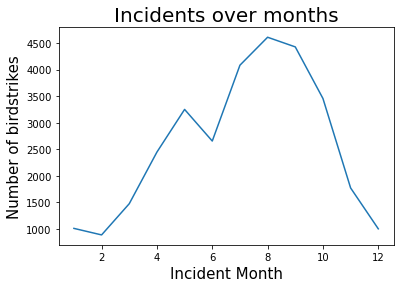

In [99]:
# Add the x-axis title
plt.xlabel("Incident Month",  fontsize=15)

# Add the y-axis title
plt.ylabel("Number of birdstrikes", fontsize=15)

# Add the plot title
plt.title("Incidents over months", fontsize=20)

df_cleaned.groupby('Incident Month').size().plot()

We can see relatively high number of birdstrikes in the months between 6 and 9 - June and September. Indeed, this is bird migration period in North America. [Source](https://www.perkypet.com/advice/bird-watching/bird-migration-facts/timing)

According to Wikipedia, the majority of bird collisions occur near or at airports (90%, according to the ICAO) during takeoff, landing and associated phases

In [107]:
phases = df_cleaned.groupby('Flight Phase').size().sort_values(ascending=False)

In [109]:
phases_df 

,0
Flight Phase,
APPROACH,13079
LANDING ROLL,6718
TAKEOFF RUN,5946
CLIMB,4669
DESCENT,460
TAXI,108
LOCAL,42
PARKED,25
DEPARTURE,14


This list shows the number of birdstrikes happened in each phase

For the purpose of more clear illustration, we had to drop some less occured phases

In [110]:
phases_df = phases.to_frame().drop(index = ['PARKED', 'LOCAL', 'DEPARTURE','TAXI'])

<ipython-input-111-6f9a941a8d5f>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(phases_df,labels=my_labels, autopct='%1.1f%%')


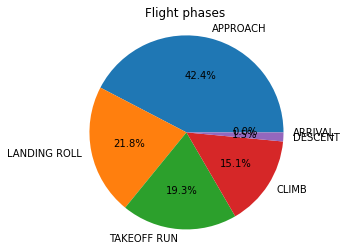

In [111]:
my_labels = list(phases_df.index)
plt.pie(phases_df,labels=my_labels, autopct='%1.1f%%')
plt.title('Flight phases')
plt.axis('equal')
plt.show()

Mostly, birdstrikes occured when the aircraft was in Approach, Takeoff, and Landing flight phase

Now let's see in which state most of the birdstikes occured

In [112]:
state_counts = df_cleaned['State'].value_counts()
states = state_counts.index
counts = state_counts.values

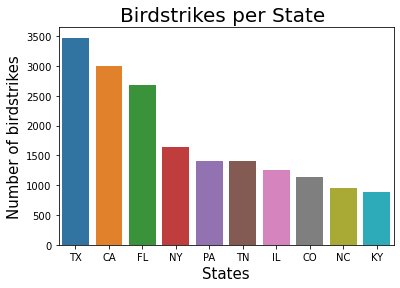

In [113]:
plt.xlabel("States", fontsize=15)
plt.ylabel("Number of birdstrikes", fontsize=15)
plt.title("Birdstrikes per State ", fontsize=20)
barplot = sns.barplot(x=states[:10], y=counts[:10])

The plot shows the number of birdstikes on y axis and State code on x axis. We can see that Texas, California, Florida are the states where the most of birdstrikes occured

Nearly half of the birdstrikes (>12000) occured in 0 height

In [125]:
height_counts = df_cleaned['Height'].value_counts().sort_values(ascending=False)
heights = height_counts.index
h_counts = height_counts.values

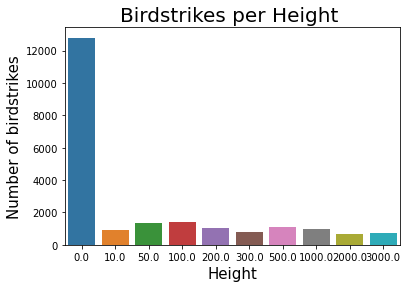

In [127]:
plt.xlabel("Height", fontsize=15)
plt.ylabel("Number of birdstrikes", fontsize=15)
plt.title("Birdstrikes per Height ", fontsize=20)
barplot = sns.barplot(x=heights[:10], y=h_counts[:10])

Top species (birds)

In [129]:
bird_counts = df_cleaned.groupby('Species Name').size().sort_values(ascending=False)
birds = bird_counts.index
b_counts = bird_counts.values 

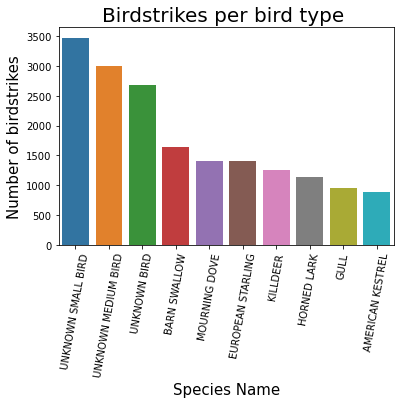

In [135]:
plt.xlabel("Birds", fontsize=15)
plt.ylabel("Number of birdstrikes", fontsize=15)
plt.title("Birdstrikes per bird type ", fontsize=20)
plt.xticks(rotation=80)
barplot = sns.barplot(x=birds[:10], y=counts[:10])

According to *skybrary*, around 90% of recorded bird strikes occur during daylight, but since this is also when most aircraft fly, strike rates can sometimes actually be higher at night. Source: https://www.skybrary.aero/index.php/Bird_Behaviour

Let's check this fact with our dataset. We can see that indeed most of the (63%) birdstrikes occured during the day.

In [90]:
visibilities = df_cleaned.groupby('Visibility').size().sort_values(ascending=False)
visibilities_df = visibilities.to_frame()

<ipython-input-91-1fc36328c86a>:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(visibilities_df,labels=my_labels, autopct='%1.1f%%')


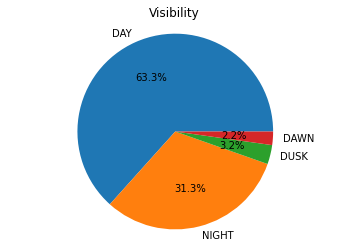

In [91]:
my_labels = list(visibilities_df.index)
plt.pie(visibilities_df,labels=my_labels, autopct='%1.1f%%')
plt.title('Visibility')
plt.axis('equal')
plt.show()

## Save files to excel

We are saving cleaned dataframe as CSV

In [140]:
airport_counts = df_cleaned['Airport ID'].value_counts()
airport_counts = df_cleaned.groupby('Airport ID').size().sort_values(ascending=False)[airport_counts > 100]

df_airports = pd.DataFrame({'Airport ID':airport_counts.index, 'Birdstrikes_N':airport_counts.values})

In [141]:
df_airports.to_csv('airports.csv', index = False)

In [142]:
df_cleaned = df_cleaned.reset_index()
df_cleaned = df_cleaned.drop(columns = ['index'])

In [143]:
df_cleaned.to_csv('df_cleaned.csv', index = False)

In [144]:
df_cleaned.head()

,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Airport ID,Airport,State,Flight Phase,Visibility,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,incident_date
0,2010,1,1,BUS,BUSINESS,C-310,KPMP,POMPANO BEACH AIRPARK,FL,TAKEOFF RUN,DAY,0.0,30.0,0.0,NE1,GULL,1,ABORTED TAKEOFF,2010-01-01
1,2010,1,1,JBU,JETBLUE AIRWAYS,A-320,KMCO,ORLANDO INTL,FL,TAKEOFF RUN,DAY,0.0,120.0,0.0,ZT3,GRACKLE,1,NONE,2010-01-01
2,2010,1,1,WJA,WESTJET,B-737-800,PHNL,HONOLULU INTL ARPT,HI,TAKEOFF RUN,NIGHT,0.0,NaN,0.0,N5122,PACIFIC GOLDEN-PLOVER,1,NONE,2010-01-01
3,2010,1,1,DAL,DELTA AIR LINES,B-737-800,KMIA,MIAMI INTL,FL,LANDING ROLL,DAY,0.0,NaN,0.0,N5111,KILLDEER,2-10,NONE,2010-01-01
4,2010,1,1,AAL,AMERICAN AIRLINES,MD-82,KDFW,DALLAS/FORT WORTH INTL ARPT,TX,CLIMB,DAY,800.0,160.0,NaN,H4105,DOUBLE-CRESTED CORMORANT,2-10,NONE,2010-01-01
